In [28]:
# As specified by the problem
R = 10.73146 # Universal gas constant, psia-ft3/R-lbm mol

# From table B-33
name = ['CO2', 'N2', 'C1', 'C2', 'C3', 'iC4', 'nC4', 'iC5', 'nC5', 'C6', 'C7+']
yi = [4.01, 0.85, 89.83, 2.88, 1.30, 0.32, 0.43, 0.15, 0.11, 0.07, 0.05]
xi = [1.12, 0.03, 10.68, 2.56, 3.86, 2.60, 5.31, 3.88, 4.16, 7.58, 58.22]
zi_reported = [3.84, 0.80, 85.12, 2.86, 1.45, 0.46, 0.72, 0.37, 0.35, 0.52, 3.51]
ncomps = len(name)
Ki_reported = [yi[i] / xi[i] for i in range(ncomps)]


In [29]:
psep = 390 + 14.7 #psia
tsep = 52 + 460 # deg R

#From table 3.3
bi = [652, 470, 300, 1145, 1799, 2037, 2153, 2368, 2480, 2738]
Tbi = [194, 109, 94, 303, 416, 471, 491, 542, 557, 610 ]

# Estimate parameters for C7+
nc7p = 7.3 + 0.0075*(tsep - 460) + 0.0016*psep # Eq 3.161f, t is in deg F
bc7p = 1013 + 324 * nc7p - 4.256 * nc7p**2 # Eq 3.161g
Tbc7p = 301 + 59.85 * nc7p - 0.971*nc7p**2 # Eq 3.161h
bi.append(bc7p)
Tbi.append(Tbc7p)

In [30]:
# Next, estimate Fi values
# ** Note: Dialog suggests that equation 3.156 be used, but  Eq 3.161b (Standing low pressure K-values method) is used instead
# This correlation is valid for Psep < 1,000 psia and Tsep < 200 deg F
Fi = [bi[i]*(1/Tbi[i] - 1/tsep) for i in range(ncomps)]
Kipsp = [Ki_reported[i]*psep for i in range(ncomps)]

# Calculate Ki's from Standing correlation
A0 = 1.2 + (4.5e-4*psep) + (15e-8*psep**2) # Eq 3.161d
A1 = 0.890 - (1.7e-4*psep) - (3.5e-8*psep**2) # Eq 3.161e
Ki_standing = [1/psep*10**(A0+A1*Fi[i]) for i in range(ncomps)]
Standing_Kipsp = [Ki_standing[i]*psep for i in range(ncomps)]

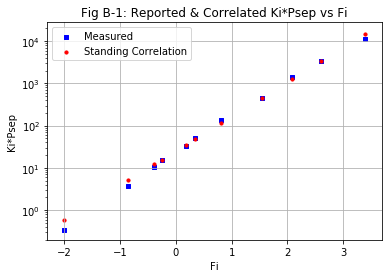

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

# ** Note: Fig B-1 is referenced, but I was uable to find it
# Here is the plot
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.yscale('log')
ax1.scatter(Fi, Kipsp, s=10, c='b', marker="s", label='Measured')
ax1.scatter(Fi, Standing_Kipsp, s=10, c='r', marker="o", label='Standing Correlation')
plt.legend(loc='upper left');
plt.grid()
plt.title('Fig B-1: Reported & Correlated Ki*Psep vs Fi')
plt.xlabel('Fi')
plt.ylabel('Ki*Psep')
plt.show()

In [35]:
# Given Mosp and rho_osp (MW and density of separator oil)
Mosp = 100.2 #lbm/lbm mol [calculated from sum(xi * MWi)]
rho_osp = 45.28 #lbm/ft3 (Calculated from Standing-Katz - Eq 3.89 - 3.92)
Rsp = 15357 # Separator GOR (scf/stb) - I assume this was meant to be given as it is usually a key measured parameter

Fgsp = (1+(2130*rho_osp)/(Mosp*Rsp))**-1 # Eq 6.8
zi_calc = [Fgsp*yi[i]+(1-Fgsp)*xi[i] for i in range(ncomps)]

In [38]:
# And print results
from tabulate import tabulate
print('Table B-33 Recombined Separator wellstream molar composition & consistency check of separator K values with Standing Low Pressure K-value correlation (Problem 20)')
header=['Component', 'yi', 'xi', 'zi reported', 'zi calculated', 'Fi', 'Standing Ki', 'Reported Ki']
table = []
for i in range(ncomps):
    table.append([name[i], yi[i], xi[i], round(zi_reported[i],3), round(zi_calc[i],3), round(Fi[i],3), round(Ki_standing[i],5), round(Ki_reported[i],5)])
table.append(['Total:', round(sum(yi),3),round(sum(xi),3), round(sum(zi_reported),3), round(sum(zi_calc),3), ' ', ' ', ' '])
print(tabulate(table,headers=header))

Table B-33 Recombined Separator wellstream molar composition & consistency check of separator K values with Standing Low Pressure K-value correlation (Problem 20)
Component        yi      xi    zi reported    zi calculated  Fi      Standing Ki    Reported Ki
-----------  ------  ------  -------------  ---------------  ------  -------------  -------------
CO2            4.01    1.12           3.84            3.84   2.087   3.17503        3.58036
N2             0.85    0.03           0.8             0.802  3.394   36.91605       28.33333
C1            89.83   10.68          85.12           85.162  2.606   8.4003         8.41105
C2             2.88    2.56           2.86            2.861  1.543   1.14143        1.125
C3             1.3     3.86           1.45            1.451  0.811   0.28891        0.33679
iC4            0.32    2.6            0.46            0.454  0.346   0.12077        0.12308
nC4            0.43    5.31           0.72            0.718  0.18    0.08835        0.08098


In [40]:
# Watson charcterization factor of C7+ (asked to calculate, but example didn't)
sg_c7p = 0.7783 # From Table B-33
Kw = Tbi[-1]**(1/3)/sg_c7p #Eq 5.34
print('Watson characterization factor of C7+:', round(Kw,3))

Watson characterization factor of C7+: 11.582
